In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [53]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [54]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['od']

In [55]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            df = pd.read_csv(root_dir + 'converted_road_to_area_od/' + _dir + 'seed' + _seed + _csv + '.csv')
            csv_array[_dir][_seed][_csv] = df

In [58]:
people = 'people30000'
seed = '123'
csv = 'od'
df = csv_array[people][seed][csv].copy()
df.shape

(17711, 19)

In [6]:
def create_origin_destination(df):
    df_base = pd.DataFrame(columns=['origin', 'destination'])
    
    for row in df.values.tolist():
        row = [x for x in row if not np.isnan(x)]
        df_row = pd.DataFrame([[row[0], row[-1]]], columns=df_base.columns)
        df_base = pd.concat([df_base, df_row])

    df_base.reset_index(drop=True, inplace=True)
    return df_base

In [7]:
# df = df.dropna(how='all')
# create_origin_destination(df)

In [8]:
# for _dir in dir_list:
#     for _seed in seed_list:
#         for _csv in csv_list:
#             df = csv_array[_dir][_seed][_csv].copy()
#             df = df.dropna(how='all')
#             df = create_origin_destination(df)
# #             csv_array[_dir][_seed][_csv] = df
# #             df.to_csv(root_dir + 'origin_destination_od/' + _dir + 'seed' + _seed + _csv + '.csv', index=False)

In [9]:
def create_2d(df, col_name):
    df_area = pd.DataFrame(np.zeros((81, 2)), columns=['area', 'people'])
    df_area['area'] = [float(i) for i in range(81)]
    
    for r in df.loc[:, col_name]:
        df_area.loc[r, 'people'] += 1
    
    return df_area

In [10]:
# csv_array = {}
# for _dir in dir_list:
#     csv_array[_dir] = {}
#     for _seed in seed_list:
#         csv_array[_dir][_seed] = {}
#         for _csv in csv_list:
#             csv_array[_dir][_seed][_csv] = {}
            
#             df = pd.read_csv(root_dir + 'origin_destination_od/' + _dir + 'seed' + _seed + _csv + '.csv')
#             for _col in ['origin', 'destination']:
#                 df_2d = create_2d(df, _col)
#                 csv_array[_dir][_seed][_csv][_col] = df_2d
# #                 df_2d.to_csv(root_dir + 'origin_destination_od_2D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv')

In [11]:
# for _dir in dir_list:
#     for _seed in seed_list:
#         for _csv in csv_list:
#             for _col in ['origin', 'destination']:
#                 df = pd.read_csv(root_dir + 'origin_destination_od_2D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv')

#                 df_new = pd.DataFrame()
#                 for i in range(9):
#                     tmp = df.loc[i*9:i*9+8, 'people']
#                     tmp.reset_index(drop=True, inplace=True)
#                     df_new = pd.concat([df_new, tmp], axis=1)

#                 df_new = df_new.T
#                 df_new.columns=(['{0:02d}'.format(i*10) for i in range(9)])
#                 df_new.index=([str(i) for i in range(9)])
#                 df = df_new
#                 print(_dir, _seed, _col)
#                 print(df.sum().sum())
# #                 df.to_csv(root_dir + 'origin_destination_od_3D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv')

In [12]:
csv_array_2d = {}
for _dir in dir_list:
    csv_array_2d[_dir] = {}
    for _seed in seed_list:
        csv_array_2d[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_2d[_dir][_seed][_csv] = {}
            for _col in ['origin', 'destination']:
                df = pd.read_csv(root_dir + 'origin_destination_od_2D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv', index_col=0)
                csv_array_2d[_dir][_seed][_csv][_col] = df

In [13]:
def area_to_contour(area_id):
    area_one_length = 9
    area_id = int(area_id)
    left = str(area_id // area_one_length)
    right = str(area_id % area_one_length) + '0'
    return left+right

In [21]:
df = csv_array_2d[people][seed][csv]['origin'].copy()
df['area'] = df['area'].apply(area_to_contour)
df.sort_values(['people'], ascending=False)
df['people'].sum()

12265.0

In [15]:
csv_array_3d = {}
for _dir in dir_list:
    csv_array_3d[_dir] = {}
    for _seed in seed_list:
        csv_array_3d[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array_3d[_dir][_seed][_csv] = {}
            for _col in ['origin', 'destination']:
                df = pd.read_csv(root_dir + 'origin_destination_od_3D/' + _dir + 'seed' + _seed + _csv + '_' + _col + '.csv', index_col=0)
                csv_array_3d[_dir][_seed][_csv][_col] = df

In [31]:
import seaborn as sns
def create_contour(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)

    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [49]:
people = 'people30000'
seed = '123'

17538.0


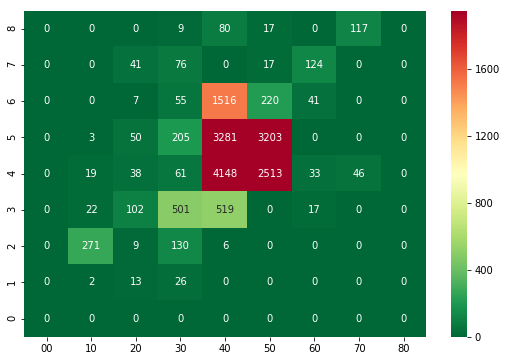

In [50]:
df = csv_array_3d[people][seed][csv]['origin'].copy()
df = df.sort_index(ascending=False)
print(df.sum().sum())
create_contour(df)
# create_contour(df, '{0}seed{1}_{2}_for_mobile_origin'.format(people, seed, csv))

17538.0


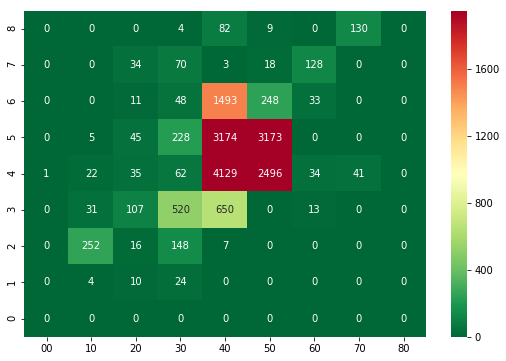

In [51]:
df = csv_array_3d[people][seed][csv]['destination'].copy()
df = df.sort_index(ascending=False)
print(df.sum().sum())
create_contour(df)
# create_contour(df, '{0}seed{1}_{2}_for_mobile_destination'.format(people, seed, csv))